# EN5204 Assignment 1 on Image Processing: Intensity Transformations and Neighborhood Filtering
#### Sivayogaraj.K 
#### 228047A

## Import Required packages 

In [12]:
import cv2 as cv 
import math
import numpy as np
import matplotlib.pyplot as plt

## Question 1

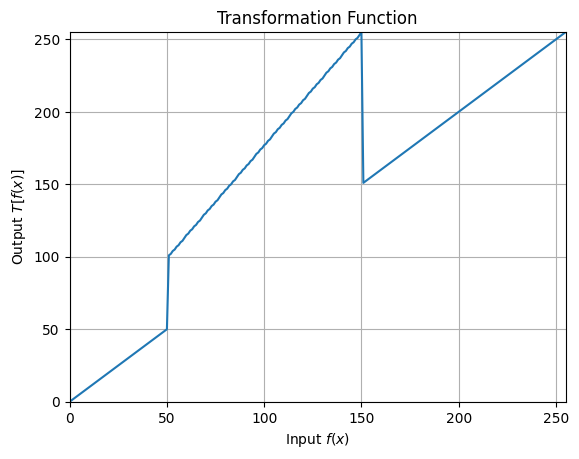

In [13]:
img = cv.imread('images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.imwrite('1.image_Orig.jpg',img)

t1 = np.linspace(0,50,51).astype('uint8')   #Creating regions Look up table
t2 = np.linspace(50,100,0).astype('uint8')   
t3 = np.linspace(101,255,100).astype('uint8')   
t4 = np.linspace(255,150,0).astype('uint8')
t5 = np.linspace(151,255,105).astype('uint8')

transform = np.concatenate((t1,t2,t3,t4,t5),axis=0).astype('uint8') #Creating the transformation functions

im_pro = transform[img] 

cv.namedWindow('Transformed',cv.WINDOW_NORMAL)
cv.imshow('Transformed',im_pro)
cv.imwrite('1.image_Proce.jpg',im_pro)

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.title('Transformation Function')
# plt.axes().set_aspect('equal')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.grid(visible=True)
plt.savefig('1.plot.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

## Question 2 

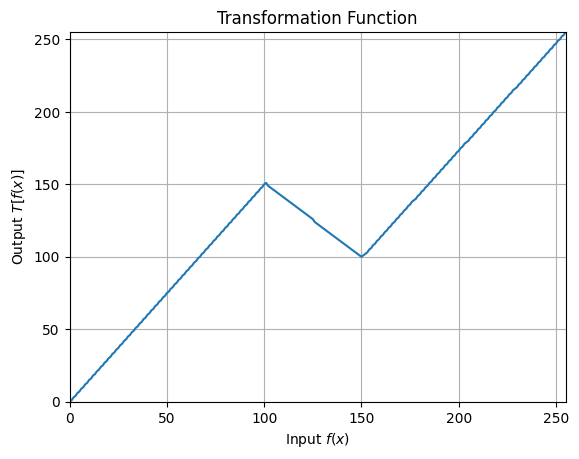

In [8]:
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
# cv.imwrite('2.1.image_Orig.jpg',img)

t1 = np.linspace(0,150,101).astype('uint8')   #Creating regions Look up table
t2 = np.linspace(151,100,50).astype('uint8')
t3 = np.linspace(101,255,105).astype('uint8')

transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8') #Creating the transformation functions

im_pro = transform[img] 

cv.namedWindow('Transformed',cv.WINDOW_NORMAL)
cv.imshow('Transformed',im_pro)
# cv.imwrite('2.1.image_Proce.jpg',im_pro)

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.title('Transformation Function')
# plt.axes().set_aspect('equal')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.grid(visible=True)
# plt.savefig('2.1.plot.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
img = cv.imread('images/brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
assert img is not None
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
# cv.imwrite('2.2.image_Orig.jpg',img)

t1 = np.linspace(0,150,101).astype('uint8')   #Creating regions Look up table
t2 = np.linspace(151,100,50).astype('uint8')
t3 = np.linspace(101,255,105).astype('uint8')

transform = np.concatenate((t1,t2,t3),axis=0).astype('uint8') #Creating the transformation functions

im_pro = transform[img] 

cv.namedWindow('Transformed',cv.WINDOW_NORMAL)
cv.imshow('Transformed',im_pro)
# cv.imwrite('2.2.image_Proce.jpg',im_pro)

plt.plot(transform)
plt.xlim(0,255)
plt.ylim(0,255)
plt.title('Transformation Function')
# plt.axes().set_aspect('equal')
plt.xlabel('Input $f(x)$')
plt.ylabel('Output $T[f(x)]$')
plt.grid(visible=True)
# plt.savefig('2.2.plot.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

## Question 3

In [16]:
def GammaCorr(image=0,gamma = 1.0):
    table = np.arange(0,256).astype('uint8')
    table = (((table/255.0)**gamma)*255).astype('uint8')
    return table[image]

img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
cv.imwrite('3.image_Orig.jpg',img)

for r in np.arange(0.0,2.5,0.1):
    if r==1.0:
        continue
    adj = GammaCorr(img,r)
    cv.putText(adj,"Gamma = {}".format(r),(20,40),cv.FONT_HERSHEY_SIMPLEX,1.5,(0,0,255),3)
    cv.namedWindow('Images',cv.WINDOW_NORMAL)
    cv.imshow('Images',np.hstack([img,adj]))
    cv.imwrite('3.GammaCorrection_Results/Gamma_%.1f.jpg'%r,adj)
    cv.waitKey(100)
cv.destroyAllWindows()



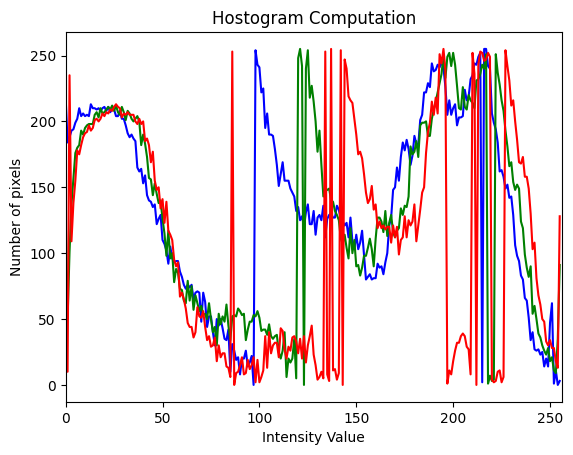

In [15]:
img = cv.imread('images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)

b,g,r = cv.split(img)
layers = np.array([b,g,r])
color = ['b','g','r']
for i,channel in enumerate(layers):
    hist = np.zeros(256)
    for r in channel:
        hist[r]+=1
    plt.plot(hist.astype('uint8'),color=color[i])
    plt.xlim(0,256)

    
# plt.savefig('3.1.plot.png')
plt.xlabel('Intensity Value')
plt.ylabel('Number of pixels')
plt.title('Hostogram Computation')
# plt.savefig('3.2.plot.png')
plt.show()

# cv.imwrite('1.image.jpg',img)

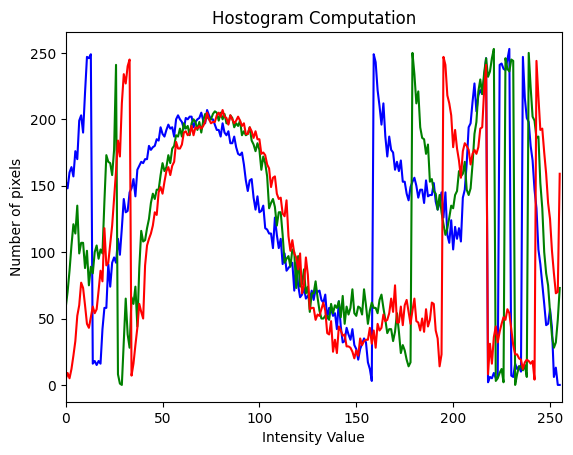

In [17]:
img = cv.imread('3.GammaCorrection_Results/Gamma_0.5.jpg',cv.IMREAD_COLOR)

b,g,r = cv.split(img)
layers = np.array([b,g,r])
color = ['b','g','r']
for i,channel in enumerate(layers):
    hist = np.zeros(256)
    for r in channel:
        hist[r]+=1
    plt.plot(hist.astype('uint8'),color=color[i])
    plt.xlim(0,256)

    
# plt.savefig('3.1.plot.png')
plt.xlabel('Intensity Value')
plt.ylabel('Number of pixels')
plt.title('Hostogram Computation')
# plt.savefig('3.2.plot.png')
plt.show()

# cv.imwrite('1.image.jpg',img)

## Question 4

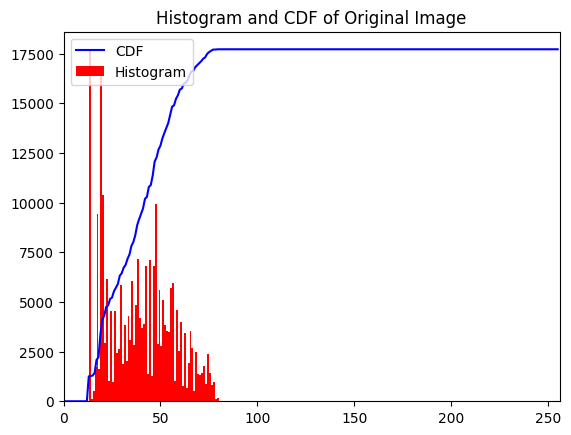

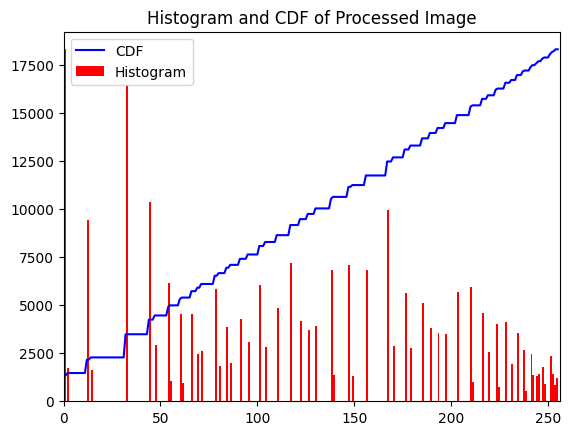

In [18]:
img = cv.imread('images/shells.png',cv.IMREAD_GRAYSCALE)  #reading the original image 
cv.namedWindow('Original',cv.WINDOW_NORMAL)
cv.imshow('Original',img)
cv.imwrite('4.image_Orig.jpg',img)

hist,bins = np.histogram(img.flatten(),256,[0,256])  #calculating the histogram and cdf befor equalizing
cdf = hist.cumsum()
cdf_norm = cdf*hist.max()/cdf.max()

plt.plot(cdf_norm,color = 'b')    #plotting the histogram and cdf
plt.hist(img.flatten(),256,[0,256],color='r')
plt.legend(('CDF','Histogram'),loc='upper left')
plt.xlim(0,256)
plt.title('Histogram and CDF of Original Image')
plt.savefig('4.plot_Orig.png')
plt.show()

cdf_m = np.ma.masked_equal(cdf,0)   #Equalizing Manually
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img_equal = cdf[img]

#img_equal = cv.equalizeHist(img)  #Equalizing using unbuilt function

cv.namedWindow('Equalized',cv.WINDOW_NORMAL)   #showing equalized image
cv.imshow('Equalized',img_equal)
cv.imwrite('4.image_Proce.jpg',img_equal)

hist,bins = np.histogram(img_equal.flatten(),256,[0,256])  #Calculating histogram and cdf
cdf=hist.cumsum()
cdf_norm = cdf*hist.max()/cdf.max()

plt.plot(cdf_norm,color = 'b')  #plotting
plt.hist(img_equal.flatten(),256,[0,256],color='r')
plt.legend(('CDF','Histogram'),loc='upper left')
plt.xlim(0,256)
plt.title('Histogram and CDF of Processed Image')
plt.savefig('4.plot_Proce.png')
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()



## Question 5

In [19]:
scaling_Factor = 4


def NearestNeighbourScaling(image,scale):
    dim = np.multiply(img.shape,(scale,scale))
    result = np.zeros(dim)
    for i in range(0,dim[0]):
        for j in range(0,dim[1]):
            result[i,j] = image[int(math.floor(i/scale)),int(math.floor(j/scale))]
    return np.uint8(result)

imOr = cv.imread('images/a1q5images/a1q5images/im01.png',cv.IMREAD_GRAYSCALE)
img= cv.imread('images/a1q5images/a1q5images/im01small.png',cv.IMREAD_GRAYSCALE)
scaled_image = NearestNeighbourScaling(img,scaling_Factor)

h,w = imOr.shape

cv.namedWindow('Original Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image',img)
cv.imwrite('Original.png',img)
cv.waitKey(0)
cv.namedWindow('Nearest_Neighbor_Scaled_Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Nearest_Neighbor_Scaled_Image',scaled_image)
cv.imwrite('Result.png',scaled_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
scale = 2

def Bilinear_Interpolation_Scaling(image,scale):
    dim = np.multiply(image.shape,(scale,scale)) #create the resultant image
    result = np.zeros(dim)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            result[i*scale,j*scale] = image[i,j] #fill the cells of resultant image with a gap of scale
    for i in range(0,dim[0]-scale):
        for j in range(0,dim[1]-scale):  
            if( (i%scale != 0) or (j%scale != 0)):  #take a 2x2 grid 
                h00 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale))*scale] #base value
                h01 = result[int(math.floor(i/scale)+1)*scale , int(math.floor(j/scale))*scale]
                h10 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale)+1)*scale]
                h11 = result[int(math.floor(i/scale)+1)*scale ,int(math.floor(j/scale)+1)*scale]
                grad_y = math.modf(j/scale)[0]
                grad_x = math.modf(i/scale)[0]
                base = h00  
                diff_x = h01-h00
                diff_y = h10-h00
                diff_xy= h00-h10-h01+h11
                result[i,j] = base + diff_x*grad_x + diff_y*grad_y + diff_xy*grad_x*grad_y
    return result.astype('uint8')


img = cv.imread('images/a1q5images/a1q5images/im02small.png',cv.IMREAD_GRAYSCALE)
cv.imwrite('Org1.png',img)
Processed = Bilinear_Interpolation_Scaling(img,scale)

cv.namedWindow('Original Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image',img)
cv.waitKey(0)
cv.namedWindow('Bilinear_Interpolation_Scaled_Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Bilinear_Interpolation_Scaled_Image',Processed)
cv.imwrite('Re1.png',Processed)
cv.waitKey(0)
cv.destroyAllWindows()



In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
scaling_Factor = 4

def SSD(imageOriginal,imageZoomed):
    assert imageOriginal.shape == imageZoomed.shape
    h, w = imageOriginal.shape
    num = np.sum(np.power((imageZoomed-imageOriginal),2))
    deno = h*w
    return float(num)/float(deno)


def NearestNeighbourScaling(image,scale):
    dim = np.multiply(img.shape,(scale,scale))
    result = np.zeros(dim)
    for i in range(0,dim[0]):
        for j in range(0,dim[1]):
            result[i,j] = image[int(math.floor(i/scale)),int(math.floor(j/scale))]
    return np.uint8(result)

def Bilinear_Interpolation_Scaling(image,scale):
    dim = np.multiply(image.shape,(scale,scale)) #create the resultant image
    result = np.zeros(dim)
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            result[i*scale,j*scale] = image[i,j] #fill the cells of resultant image with a gap of scale
    for i in range(0,dim[0]-scale):
        for j in range(0,dim[1]-scale):
            if( (i%scale != 0) or (j%scale != 0)):  #take a 2x2 grid
                h00 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale))*scale] #base value
                h01 = result[int(math.floor(i/scale)+1)*scale , int(math.floor(j/scale))*scale]
                h10 = result[int(math.floor(i/scale))*scale , int(math.floor(j/scale)+1)*scale]
                h11 = result[int(math.floor(i/scale)+1)*scale ,int(math.floor(j/scale)+1)*scale]
                grad_y = math.modf(j/scale)[0]
                grad_x = math.modf(i/scale)[0]
                base = h00
                diff_x = h01-h00
                diff_y = h10-h00
                diff_xy= h00-h10-h01+h11
                result[i,j] = base + diff_x*grad_x + diff_y*grad_y + diff_xy*grad_x*grad_y
    return result.astype('uint8')


imOr = cv.imread('images/a1q5images/a1q5images/im02.png',cv.IMREAD_GRAYSCALE)
img= cv.imread('images/a1q5images/a1q5images/im02small.png',cv.IMREAD_GRAYSCALE)
scaled_image_Near = NearestNeighbourScaling(img,scaling_Factor)
scaled_image_Bi = Bilinear_Interpolation_Scaling(img,scaling_Factor)

print("SSD of Nearest-Neighbour: %.3f"%SSD(imOr,scaled_image_Near))
print("SSD of Bilinear: %.3f"%SSD(imOr,scaled_image_Bi))

cv.namedWindow('Original Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Original Image',img)
cv.imwrite('Original.png',img)
cv.waitKey(0)

cv.namedWindow('Nearest_Neighbor_Scaled_Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Nearest_Neighbor_Scaled_Image',scaled_image_Near)
cv.imwrite('ResultNear.png',scaled_image_Near)

cv.namedWindow('BilinearInter_Scaled_Image',cv.WINDOW_AUTOSIZE)
cv.imshow('BilinearInter_Scaled_Image',scaled_image_Near)
cv.imwrite('ResultBi.png',scaled_image_Bi)

cv.waitKey(0)
cv.destroyAllWindows()

SSD of Nearest-Neighbour: 11.934
SSD of Bilinear: 16.689


## Question 6

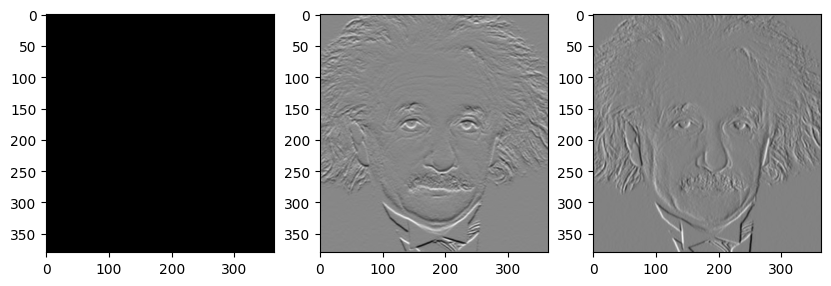

In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None

im = cv.normalize(im.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX) # Converting to a float image in [0,1]
sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
result_v = cv.filter2D(im, -1, sobel_v)
result_v = cv.normalize(result_v, result_v, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)
result_h = cv.filter2D(im, -1, sobel_h)
result_h = cv.normalize(result_h, result_h, 0, 255, cv.NORM_MINMAX, dtype=cv.CV_32F)

fig, ax = plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(im, cmap='gray')
ax[1].imshow(result_v, cmap='gray', vmin=0, vmax=255)
ax[2].imshow(result_h, cmap='gray', vmin=0, vmax=255)
plt.show()

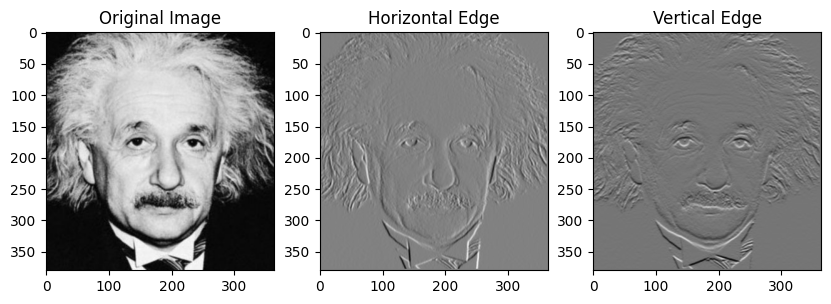

In [38]:

def convolution(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

def sobel_edge_detection(image, filter,verbose=False):
    new_image_x = convolution(image, filter, verbose)
    new_image_y = convolution(image, np.flip(filter.T, axis=0), verbose)

    fig, ax = plt.subplots(1,3, figsize=(10,20))
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Original Image")
    ax[1].imshow(new_image_x, cmap='gray')
    ax[1].set_title("Horizontal Edge")
    ax[2].imshow(new_image_y, cmap='gray')
    ax[2].set_title("Vertical Edge")
    plt.show()

image = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None
filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])   
sobel_edge_detection(image, filter, verbose=True) 

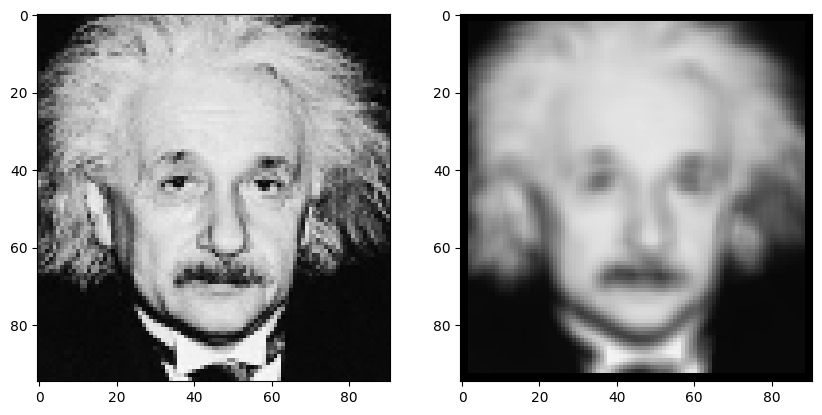

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('images/einstein.png', cv.IMREAD_GRAYSCALE)
assert im is not None

kernel = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1 # Ensuring that the kernel is odd-shaped
k_hh, k_hw = kernel.shape[0]//2, kernel.shape[1]//2 # Half-height and half-width of the kernel

h, w = im.shape
result = np.zeros(im.shape, np.float32)
for m in range(k_hh, h - k_hh):
    for n in range(k_hw, w - k_hw):
        result[m, n] = np.dot(im[m - k_hh : m + k_hh + 1, n - k_hw : n + k_hw + 1].flatten(), kernel.flatten()) # Dot product for the innner two loops

fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(result, cmap='gray', vmin=0, vmax=255)
plt.show()

## Question 7

In [ ]:
im = cv.imread('images/daisy.jpg')

# create a simple mask image similar to the loaded image, with the shape and return type
mask = np.zeros(im.shape[:2], np.uint8)

# specify the background and foreground model using numpy the array is constructed of 1 row and 65 columns, and all array elements are 0 
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

# define the Region of Interest (ROI) as the coordinates of the rectangle where the values are entered as
# (startingPoint_x, startingPoint_y, width, height) these coordinates are according to the input image
# it may vary for different images
rectangle = (50, 100, 550, 500)

# apply the grabcut algorithm with appropriate values as parameters, number of iterations = 3
# cv2.GC_INIT_WITH_RECT is used because of the rectangle mode is used
cv.grabCut(im, mask, rectangle,
			backgroundModel, foregroundModel,
			3, cv.GC_INIT_WITH_RECT)

# In the new mask image, pixels will be marked with four flags
# four flags denote the background / foreground
# mask is changed, all the 0 and 2 pixels are converted to the background
# mask is changed, all the 1 and 3 pixels are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

# The final mask is multiplied with the input image to give the segmented image.
image = im * mask2[:, :, np.newaxis]

# output segmented image with colorbar
fig, ax = plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im)
ax[1].imshow(image)
plt.show()
